# What to do with dataset before putting it into a ML model
* The amount of the features(columns without the target) has to be - (`the sataset length` / `10-100`)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
%matplotlib inline

# Delete uneccery columns

In [46]:
df = sb.load_dataset('titanic')
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [47]:
#Fromthis dataframe.delete the column('column name',axis = 1=column/0=row number,inplace=True => will drop from the real df, false will make a copy of the df withoutthe column )
df.drop('deck', axis=1, inplace=True)
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False


# Take care of nulls
Somtimes we get datasets with nulls inside.<br>
We would want to fill the nulls in other data.<br>
Because the ML models doesn't like nulls - zeros or another numbers are great.<br>
How to fill the nulls in a non random way? There are more ways in https://en.wikipedia.org/wiki/Central_tendency

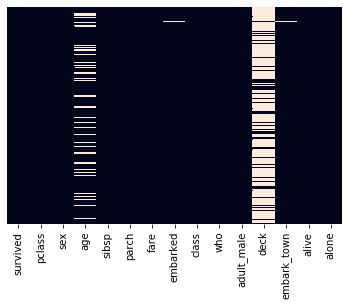

In [34]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

show an histogram of suppost values but les than expected (gausian)

In [ ]:
# On few extreme scores/Have ordinal data
df.age.fillna(df.Age.median(),inplace=True) # median = חציון
# On nominal data/The distribution is blimodal/Have ordinal data
df.age.fillna(df.Age.mode(),inplace=True)   # mode = שכיח
df.age.fillna(df.Age.mean(),inplace=True)   # mean = ממוצע
df.age.fillna(method('ffill'),inplace=True) # Changes the nulls to thier next value that isn't null in the array
df.age.fillna(method('bfill'),inplace=True) # Changes the nulls to thier previous value that isn't null in the array
df.age.fillna(ML_function(),inplace=True)   # Use a ML model

# Turn around the dataset
If there is relation between rows in the dataset. like stocks.<br>
We should add a column (or many).<br>
Because the model doesn't look at a row in comparison to other.

In [31]:
df = pd.read_csv('Datasets/stocks.csv')
df

,name,time,price
0,AAPL,20:00,12
1,AAPL,21:00,15
2,AAPL,22:00,18
3,AAPL,23:00,7
4,FB,20:00,11
5,FB,21:00,10
6,FB,22:00,16
7,FB,23:00,19


Now the model can see that AAPL is going down, and FB going up

In [32]:
pivoted = df.pivot(index='name', columns='time', values='price')
pd.DataFrame(pivoted.to_records())

,name,20:00,21:00,22:00,23:00
0,AAPL,12,15,18,7
1,FB,11,10,16,19


# Feature engineering: Combime columns
## First exemple

In [91]:
df = pd.read_csv('Datasets/pupils.csv')
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6


Sometimes we will need more data of what we have.<br>
For exmple here - if the pupil has a room for himself or have to share a room with his silvings, can affect his grade.

In [92]:
def sleeps_alone(row):
    """
    rooms = row[7]
    persons = row[8]
    if rooms > persons:
        return 1
    else:
        return 0
    """
    return 1 if row[7] > row[8] else 0
df['sleeps alone'] = df.apply(sleeps_alone, axis="columns")
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons,sleeps alone
0,adar,6,SP,113,30,70,16700,7,6,1


## Second exemple

In [93]:
df = sb.load_dataset('tips')
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


Here we don't want to predict the tip, we want to predict if the precent of the tip is bigger or smaller than 10%.<br>
So we make this column from the columns we already have.

In [94]:
def tip_class(row):
    """
    total_bill = row[0]
    tip = row[1]
    print(tip/total_bill)
    if tip/total_bill>0.1:
        return 1
    else:
        return 0
    """
    return 1 if row[1]/row[0] > 0.1 else 0
df['big tip'] = df.apply(tip_class, axis="columns")
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,big tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0


## Third exemple
We want to choose which users should get a free premium account, based on this dataset of the users we gave them a premium account and purchased it after.

In [129]:
df = pd.read_csv('Datasets/users.csv')
df

,username,age,page_visit,premium
0,123,16,homePage,1
1,798,20,SecondPage,0
2,123,16,SecondPage,1
3,568,30,homePage,0
4,123,16,SecondPage,1
5,796,25,SecondPage,0


What can help us is a new column with the number of visits of each user.

In [137]:
def visits_counter(row):
    mask = df['username'] == row[0]
    return df[mask].count()
df['visits'] = 0
df['visits'] = df.apply(visits_counter, axis="columns")
df

,username,age,page_visit,premium,visits
0,123,16,homePage,1,3
1,798,20,SecondPage,0,1
2,123,16,SecondPage,1,3
3,568,30,homePage,0,1
4,123,16,SecondPage,1,3
5,796,25,SecondPage,0,1


In [143]:
df = pd.read_csv("datasets/mal_users.csv")
df.head(1)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Res
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.2654,0.4601,0.1189,0


# Dummies

The chance to get excully 0.5 is 0.<br>
Because there is an infinity number of numbers between 0 to 1.

In [162]:
import numpy as np
np.random.randn()

-0.7129719815628356

Because of that, in a case we want to predict without mistakes or when we just don't want to predict the excully value. we will change the predict value from continuous value to a discrete (level) value.<br>
For exmple **income**:<br>
I1 =>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 - 10,000<br>
I2 => 10,000 - 20,000<br>
I3 => 30,000 - 40,000<br>

In [175]:
df = pd.read_csv('Datasets/pupils.csv')
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6


In [176]:
# The number of the labels has to be one less than the number of bins.
df['incomeLevel'] = pd.cut(df.income, bins=[0,10000,20000,30000],labels=['I1','I2','I3']) 
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons,incomeLevel
0,adar,6,SP,113,30,70,16700,7,6,I2


In [177]:
# It's still not goo, because there are models (for exemple Regression) that don't understand what it is I1 and I2 
# So we change it to numbers: I1=> 1 , I2 => 2 , I3 => 3
df['incomeLevel'] = pd.Categorical(df.incomeLevel).codes
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons,incomeLevel
0,adar,6,SP,113,30,70,16700,7,6,1


In [178]:
# It's still not good, because in one column there are diffrent numbers that don't represent their value (mybe 2 is better than 3 and 1)
# and the model can't sometimes multiply this column with X and sometimes with Y
# To solve it, we use dummies

In [179]:
# We can delete the last column. Because if we know the first two, we can know the thierd. (The model also knows it)
# If one of the first two has 1, the third will be 0.
# If no onw of the first two has 1, the third will be 1.
df = pd.get_dummies(df, columns = ['incomeLevel'], drop_first=True)
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons,incomeLevel_0,incomeLevel_1,incomeLevel_2
0,adar,6,SP,113,30,70,16700,7,6,0,1,0


In [180]:
# If the income levelis enugh for us, we don't need the income anymore and can delete it
df.drop('income', axis=1, inplace=True)
df.head(1)

,Name,Age,Country,Height,Weight,Avg Grades,house rooms,family persons,incomeLevel_0,incomeLevel_1,incomeLevel_2
0,adar,6,SP,113,30,70,7,6,0,1,0


# Activation function - Normalize the data to be on the same scale<br>
To ease the function and get better results, er apply an activation functiion on the dataset, before give itt to the model.<br>
It takes the values and changes them to value in a scale between 0 to 1.<br>
It's good as long as the rates are still the same.<br>
* MIN = 0<br>
* MAX = 1<br>

In a case we have numbers between `20(MIN)` to `80(MAX)`<br>
* 20 = 0 | Because (0*60(MAX-MIN)) + 20(MIN) = 20<br>
* 50 - 0.5 | Because (0.5*60(MAX-MIN)) + 20(MIN) = 50<br>
* 80 = 1 | Because (1*60(MAX-MIN)) + 20(MIN) = 80<br>

For exemple, the answer is 0.3<br>
0.3 * 60(MAX-MIN) = 18 +20(MIN) = 38<br>

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
df = pd.DataFrame(df2,columns=df.columns)
df.head(1)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Res
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,2.296076,2.750622,1.937015,-1.297676
